In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib
from matplotlib import pyplot as plt

workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Dataset//EDC11K_Znorm"

In [2]:
dataset = np.load(workdir + "//191204_EDC11K_z_norm_minmax.npz")
ss0 = np.load(workdir + '//191204_EDC11K_z_norm_minmax_r0_9_1.npz')

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 42


In [6]:
x.shape

(11360, 21313)

In [7]:
training_image_array.shape

(10224, 21313)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 21313) (10224,) (1136, 21313) (1136,)


In [10]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 21313)
10224 train samples
1136 test samples


In [12]:
# https://towardsdatascience.com/how-to-perform-lasso-and-lasso-regression-in-python-3b3b75541ad8
# https://brunch.co.kr/@itschloe1/11
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.001)

lasso_regressor.fit(train_X,train_y)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-12-05 16:09:49.904053
EndTime : 2019-12-05 16:10:47.931941


C:\Users\ylab\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [13]:
import matplotlib
from matplotlib import pyplot as plt

In [14]:
predicted_classes = lasso_regressor.predict(test_X)

In [15]:
predicted_value = predicted_classes

In [17]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EDC-11K//Lasso"
c.to_csv(workdir + '//191205_EDC_11K_znorm_minmax_Lasso_result.csv')


In [18]:
c

,Predicted,Test
0,1.786581,1.393330
1,2.232111,2.079442
2,0.720527,0.308173
3,1.555277,2.079442
4,1.462473,2.079442
5,1.178672,1.270682
6,1.922053,2.079442
7,1.418905,1.674144
8,2.017718,2.079442
9,1.915002,2.079442


In [19]:
predicted_value.shape

(1136,)

In [21]:
import pickle
from sklearn.externals import joblib
joblib.dump(lasso_regressor, workdir + '//191205_EDC_11K_znorm_minmax_Lasso_model.pkl') 


['D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EDC-11K//Lasso//191205_EDC_11K_znorm_minmax_Lasso_model.pkl']

In [23]:
clf_from_joblib = joblib.load(workdir + '//191205_EDC_11K_znorm_minmax_Lasso_model.pkl') 
clf_from_joblib.predict(test_X)

array([1.7865813 , 2.2321107 , 0.72052705, ..., 1.8331358 , 1.3434501 ,
       2.3722265 ], dtype=float32)

In [24]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7411231755949963


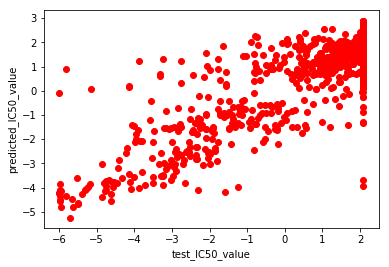

In [25]:
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//191205_EDC_11K_znorm_minmax_Ridge_scatter_plot.png')

In [26]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.028083658622218


In [ ]:
predicted_classes.shape

In [ ]:
test_X.shape

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from tensorflow.keras.utils import to_categorical

In [ ]:
quan25 = np.percentile(test_label_array,25)
quan50 = np.percentile(test_label_array,50)
quan75 = np.percentile(test_label_array,75)


In [ ]:
test_class_array = []

for x in range(len(test_label_array)):
    if test_label_array[x] <= quan25:
        test_class_array.append(0)
    elif quan25 < test_label_array[x] <= quan50:
        test_class_array.append(1)
    elif quan50 < test_label_array[x] <= quan75:
        test_class_array.append(2)
    else:
        test_class_array.append(3)

print("class 1 : %i" % test_class_array.count(0))
print("class 2 : %i" % test_class_array.count(1))
print("class 3 : %i" % test_class_array.count(2))
print("class 4 : %i" % test_class_array.count(3))
test_class_array = np.asarray(test_class_array, dtype='int32', order='C')

In [ ]:
predicted_value.shape

In [ ]:
pred_class_array = []

for x in range(len(predicted_value)):
    if predicted_value[x] <= quan25:
        pred_class_array.append(0)
    elif quan25 < predicted_value[x] <= quan50:
        pred_class_array.append(1)
    elif quan50 < predicted_value[x] <= quan75:
        pred_class_array.append(2)
    else:
        pred_class_array.append(3)

print("class 1 : %i" % pred_class_array.count(0))
print("class 2 : %i" % pred_class_array.count(1))
print("class 3 : %i" % pred_class_array.count(2))
print("class 4 : %i" % pred_class_array.count(3))

pred_class_array = np.asarray(pred_class_array, dtype='int32')

In [ ]:
# correct = np.where(predicted_classes==test_label_array)[0]
# print("Found %d correct labels" % len(correct))
# for i, correct in enumerate(correct[:5]):
#     plt.subplot(3,3,i+1)
#     plt.imshow(test_X[correct].reshape(167,167), cmap='gray', interpolation='none')
#     plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_label_array[correct]))
#     plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i+1) for i in range(num_classes)]
print(classification_report(test_class_array, pred_class_array, target_names=target_names))

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_class_array[:, i], pred_class_array[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(test_class_array.ravel(), pred_class_array.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
